In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_Q1 = pd.read_csv("data_Q1.csv")

In [5]:
training_x1 = data_Q1["x1"].to_numpy()
training_x2 = data_Q1["x2"].to_numpy()
training_y = data_Q1["y"].to_numpy()


In [6]:

training_x = np.array([[x1, x2, 1] for x1, x2 in zip(training_x1, training_x2)])

In [7]:
np.random.seed(123)

# Neural Network Representation

The neural network can be represented as follows:

$$X \xrightarrow{W^{(1)}} H \xrightarrow{\sigma} Z \xrightarrow{W^{(2)}} O \xrightarrow{\sigma} \hat{y}$$

where:

- $X$ is the input data (coming from `training_data`) of size $N \times 3$.
- $W^{(1)} = \left[ W^{(1)}_{k,l} : k, l \in \{1, 2, 3\} \right]$ is a weight matrix of size $3 \times 3$, connecting the input layer and hidden layer.
- $W^{(2)} = \begin{bmatrix} W^{(2)}_{k,1} : k \in \{1, 2, 3, 4\} \end{bmatrix}^\top$ is a weight matrix of size $4 \times 1$ between the hidden layer and the output layer.
- $\sigma$ is the sigmoid activation function, defined as:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- $H = X \times W^{(1)}$ is a matrix of size $N \times 3$ obtained at the hidden layer, before the activation function $\sigma$ is applied.
- $Z$ is a matrix of size $N \times 4$ obtained at the hidden layer after applying $\sigma$ element-wise to $H$, followed by appending a bias column at the end.
- $O = Z \times W^{(2)}$ is a matrix of size $N \times 1$ obtained at the output layer before the activation function is applied.
- $\hat{y} = \sigma(O)$ is a matrix of size $N \times 1$ containing the predicted values.


In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [9]:
def grad_sigmoid(x):
    sig_x = sigmoid(x)
    return sig_x * (1 - sig_x)

In [10]:
#function to generate random numbers between a and b
def random_generation(a, b):
  epsilon = np.random.uniform(0, 1)
  return a + epsilon*(b - a)

In [11]:
#initializing weights1 with random values
weights1 = np.empty((3, 3))
for i in range(3):
  for j in range(3):
    weights1[i, j] = random_generation(-1, 1)


In [12]:
#initializing weights2 with random values
weights2 = np.empty((4, 1))
for i in range(4):
    weights2[i] = random_generation(-1, 1)
weights2.reshape(-1, 1)
weights2.shape

(4, 1)

In [13]:
learning_rate = 0.05
max_epochs = 100

In [14]:
training_error = []

In [15]:
training_y = training_y.reshape(-1, 1)

The gradient with respect to $W^{(2)}$ is given as:

$$
\frac{\partial C}{\partial W^{(2)}_{k,l}} = 
\sum_{i=1}^{N} 
\frac{\partial C}{\partial \hat{y}_i} \cdot 
\frac{\partial \hat{y}_i}{\partial O_i} \cdot 
\frac{\partial O_i}{\partial W^{(2)}_{k,l}}
$$

The gradient with respect to $ W^{(1)} $ is given as:

$$
\frac{\partial L}{\partial W^{(1)}_{k,l}} =
\sum_{i=1}^{N} 
\frac{\partial L}{\partial \hat{y}_i} \times 
\frac{\partial \hat{y}_i}{\partial O_i} \times 
\frac{\partial O_i}{\partial Z_{i,l}} \times 
\frac{\partial Z_{i,l}}{\partial H_{i,l}} \times 
\frac{\partial H_{i,l}}{\partial W^{(1)}_{k,l}}
$$

where $k, l \in \{1, 2, 3\}$.


In [16]:
#function to compute gradient of the training error with respect to weights1
def compute_gradients_weights1(training_x, training_y, weights1, Z, H, O, y_hat):
    gradient1 = -(training_y - y_hat) * grad_sigmoid(O) * grad_sigmoid(H)
    gradient1 = gradient1 @ np.diag(weights2[:-1].reshape(-1))
    gradient1 = training_x.T @ gradient1
    gradient1 /= len(training_y)
    return gradient1

In [17]:
#function to compute gradient of the training error with respect to weights2
def compute_gradients_weights2(training_x, training_y, weights2, Z, H, O, y_hat):
    gradient2 = -(training_y - y_hat) * grad_sigmoid(O) 
    gradient2 = Z.T @ gradient2
    gradient2 /= len(training_y)
    return gradient2
    

Applying Gradient Descent on $W^{(2)}$ and $W^{(1)}$
    \begin{align*}
        W^{(2)}_{k,1} &\leftarrow W^{(2)}_{k,1} - \gamma \frac{\partial L}{\partial W^{(2)}_{k,1}}, \quad k \in \{1, 2, 3, 4\}. \\
        W^{(1)}_{k,l} &\leftarrow W^{(1)}_{k,l} - \gamma \frac{\partial L}{\partial W^{(1)}_{k,l}}, \quad k, l \in \{1, 2, 3\}.
    \end{align*}
Where $\gamma$ denotes the learning rate parameter

In [18]:
#backpropogation
def update_weights(weights1, weights2, gradient1, gradient2):
    weights1 -= learning_rate * gradient1 
    weights2 -= learning_rate * gradient2


In [19]:

for epoch in range(max_epochs):
    
    #defining parameters as mentioned in the assignment
    X = training_x
    H = X @ weights1
    Z = sigmoid(H)
    
    #appending a ones column to Z
    ones_column = np.ones((200, 1))
    Z = np.hstack((Z, ones_column)) 
    
    #calculating predicted values for y
    O = Z @ weights2
    y_hat = sigmoid(O)
        
    #calculating and appending loss with respect to labels for each epoch
    loss = np.mean(0.5 * (training_y - y_hat) ** 2)
    training_error.append(loss)
    
    #updating gradients with gradient descent
    gradient1 = compute_gradients_weights1(training_x, training_y, weights1, Z, H, O, y_hat)
    gradient2 = compute_gradients_weights2(training_x, training_y, weights2, Z, H, O, y_hat)
    update_weights(weights1, weights2, gradient1, gradient2)

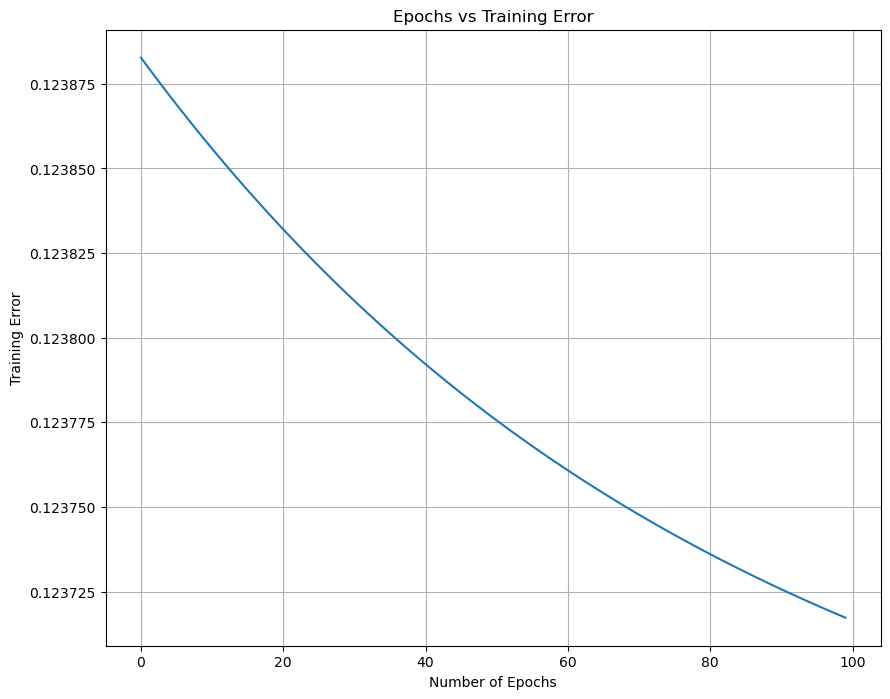

In [20]:
#plotting training error versus number of epochs
training_error = np.array(training_error)
yvals = training_error
xvals = np.arange(len(yvals))

#plotting
plt.figure(figsize = (10, 8))
plt.plot(xvals, yvals)
plt.xlabel("Number of Epochs", )
plt.ylabel("Training Error")
plt.title("Epochs vs Training Error")
plt.savefig("Epochs_vs_TrainingError")
plt.grid(True)